In [2]:
#Import all needed dependencies...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
#Import API key from api_keys py file
from api_keys import weather_api_key

#Load in citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
#Show api key to make sure its correct 
print(weather_api_key)

f8ca958d8752808c63e6c5d50aaca7ce


In [27]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
#Create lists to hold lat, and lng and to hold the cities 
lat_lngs = []
cities = []

#Create a set of random lat_response and lng_response combinations
lats = np.random.uniform(low=-90.000, high=90.000)
lngs = np.random.uniform(low=-180.000, high=180.000)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat_response, lng_response combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name_response
    
    #If the city is not saved, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

582

In [8]:
#Sets base url and units variable, combine both to set query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

#Loop through cities
for city in cities:
    
    #Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    #Basic Error handling script...
    #Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id_response = response_json['id']
        city_id_list.append(city_id_response)
            
        city_name_response = response_json['name']
        city_name_list.append(city_name_response)
        
        country_name_response = response_json['sys']['country']
        country_list.append(country_name_response)

        lng_response = response_json['coord']['lon']
        lng_list.append(lng_response)

        lat_response = response_json['coord']['lat']
        lat_list.append(lat_response)

        temp_response = response_json['main']['temp']
        temp_list.append(temp_response)

        humidity_response = response_json['main']['humidity']
        humidity_list.append(humidity_response)

        clouds_response = response_json['clouds']['all']
        clouds_list.append(clouds_response)

        wind_speed_response = response_json['wind']['speed']
        wind_speed_list.append(wind_speed_response)
    
        print(f"City Name: {city}, City ID: {city_id_response}")
    
    #Print error message and move on to the next city if there is an error
    except:
        
        print("Can't find that record, searching for a replacement value...")


SyntaxError: unexpected EOF while parsing (<ipython-input-8-026c611025d8>, line 59)

In [30]:
cities_info_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_info_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,3840300,Presidencia Roque Sáenz Peña,AR,-26.7852,-60.4388,63.57,11,1,13.33
1,5848280,Kapaa,US,22.0752,-159.3190,75.11,81,40,13.80
2,2021188,Kurumkan,RU,54.3000,110.3000,65.97,53,59,4.52
3,5866583,Saint Paul Harbor,US,57.7900,-152.4072,54.91,76,1,4.61
4,5746545,Portland,US,45.5234,-122.6762,69.10,71,75,1.01


In [28]:
cities_df.to_csv("output_data/city_weather.csv", index=False, header=True)

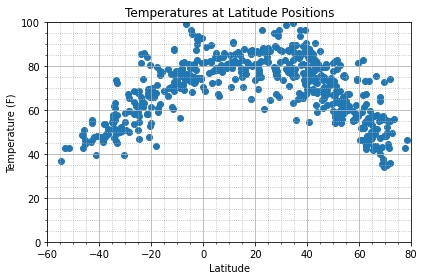

<Figure size 432x288 with 0 Axes>

In [31]:
#Setup basic plt format to start plotting
x_plotting_values = cities_info_df["Lat"]
y_plotting_values = cities_info_df["Temperature"]

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")

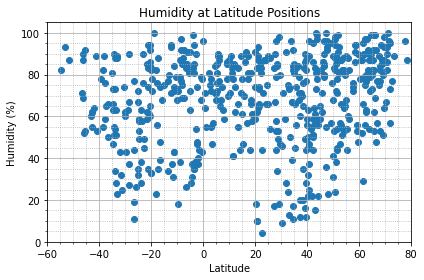

<Figure size 432x288 with 0 Axes>

In [15]:
x_plotting_values = cities_info_df["Lat"]
y_plotting_values = cities_info_df["Humidity"]

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

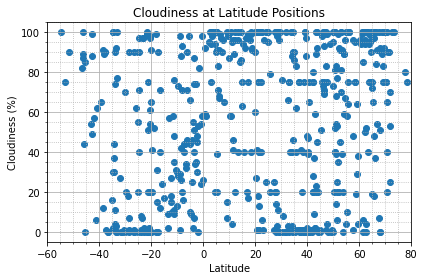

<Figure size 432x288 with 0 Axes>

In [16]:
x_plotting_values = cities_info_df["Lat"]
y_plotting_values = cities_info_df["Clouds"]

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Clouds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Clouds (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")


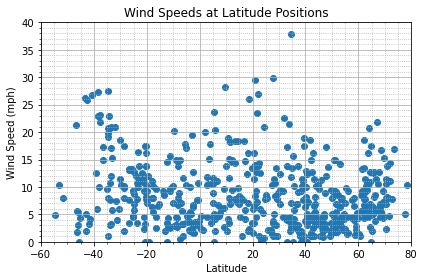

<Figure size 432x288 with 0 Axes>

In [17]:
x_plotting_values = cities_info_df["Lat"]
y_plotting_values = cities_info_df["Wind Speed"]

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Wind Speed at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

In [18]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_info_df['Lat'] > 0
northern_hemisphere_df = cities_info_df[mask]
southern_hemisphere_df = cities_info_df[~mask]

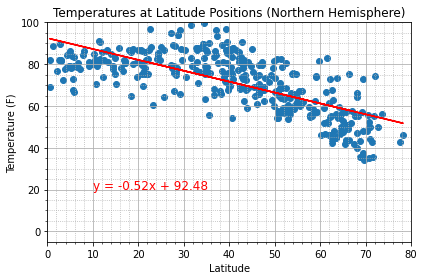

<Figure size 432x288 with 0 Axes>

In [19]:
x_plotting_values = northern_hemisphere_df["Lat"]
y_plotting_values = northern_hemisphere_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Temperatures at Latitude Positions in the Northern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")


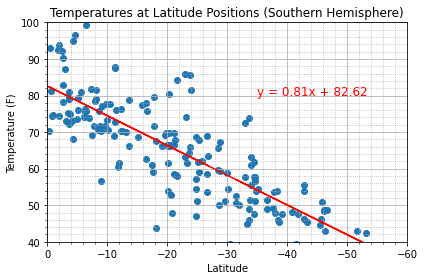

<Figure size 432x288 with 0 Axes>

In [20]:
x_plotting_values = southern_hemisphere_df["Lat"]
y_plotting_values = southern_hemisphere_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Temperatures at Latitude Positions in the Southern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_temp_regression.png")

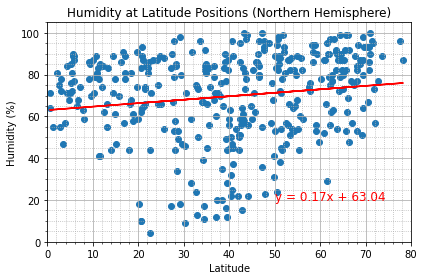

<Figure size 432x288 with 0 Axes>

In [21]:
x_plotting_values = northern_hemisphere_df["Lat"]
y_plotting_values = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Humidity at Latitude Positions in the Northern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_humid_regression.png")


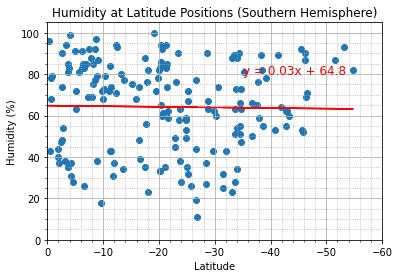

<Figure size 432x288 with 0 Axes>

In [22]:
x_plotting_values = southern_hemisphere_df["Lat"]
y_plotting_values = southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Humidity at Latitude Positions in the Southern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_humid_regression.png")

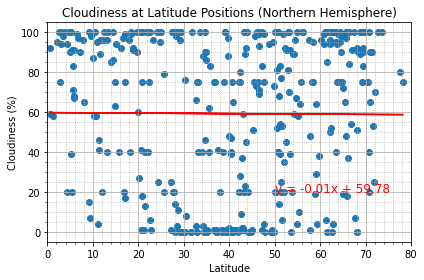

<Figure size 432x288 with 0 Axes>

In [23]:
x_plotting_values = northern_hemisphere_df["Lat"]
y_plotting_values = northern_hemisphere_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Cloudiness at Latitude Positions in the Northern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_clouds_regression.png")


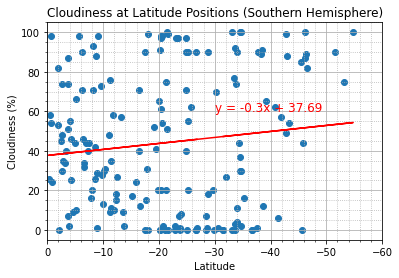

<Figure size 432x288 with 0 Axes>

In [24]:
x_plotting_values = southern_hemisphere_df["Lat"]
y_plotting_values = southern_hemisphere_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Cloudiness at Latitude Positions in the Southern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_clouds_regression.png")

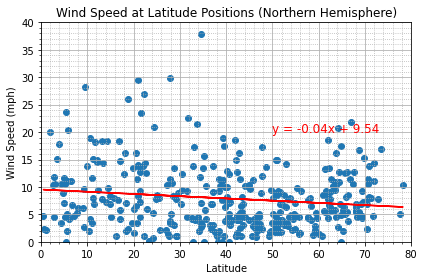

<Figure size 432x288 with 0 Axes>

In [25]:
x_plotting_values = northern_hemisphere_df["Lat"]
y_plotting_values = northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Wind Speed at Latitude Positions in the Northern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_wind_regression.png")


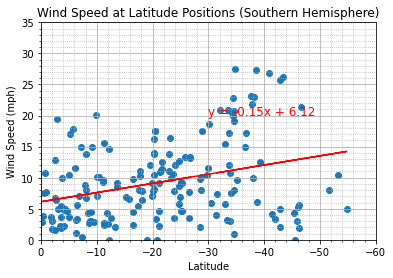

<Figure size 432x288 with 0 Axes>

In [26]:
x_plotting_values = southern_hemisphere_df["Lat"]
y_plotting_values = southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_plotting_values, y_plotting_values)
regress_values = x_plotting_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_plotting_values, y_plotting_values)

plt.scatter(x_plotting_values,y_plotting_values)
plt.title('Wind Speed at Latitude Positions in the Southern Hemisphere')
plt.plot(x_plotting_values,regress_values,"r-")
plt.annotate(line_equation,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")


In [ ]:
#There does seem to be a strong correlation between wind speed and latitude when you look at the plots. 
#Still, the linear regresion shows a much lower correlation than it appears. 
#There is a definite correlation in both hemispheres, in that the further you are from the equator,
#the higher the wind speeds are, but the slope of the regression line is much thinner from glancing at the plots. 